## Data Visualisation of Accuracy Experiment

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import LogLocator

from pathlib import Path
import pandas as pd
import sys

sys.path.append("..")
import visualization


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Load data from files
path = Path("202506052215/")
path2 = Path("202506081025/")
path3 = Path("202506081359/")
df1 = pd.read_csv(path / Path("results-qa1.csv"))
df1["qa"] = "QA1"

df2 = pd.read_csv(path / Path("results-qa2.csv"))
df2["qa"] = "QA2"

df3 = pd.read_csv(path / Path("results-qa3.csv"))
df3["qa"] = "QA3"

df4 = pd.read_csv(path / Path("results-qa4.csv"))
df4["qa"] = "QA4"

df5 = pd.read_csv(path / Path("results-qa5.csv"))
df5["qa"] = "QA5"

df6 = pd.read_csv(path2 / Path("results-qa1.csv"))
df6["qa"] = "QA1"

df7 = pd.read_csv(path2 / Path("results-qa2.csv"))
df7["qa"] = "QA2"

df8 = pd.read_csv(path2 / Path("results-qa3.csv"))
df8["qa"] = "QA3"

df9 = pd.read_csv(path2 / Path("results-qa4.csv"))
df9["qa"] = "QA4"

df10 = pd.read_csv(path2 / Path("results-qa5.csv"))
df10["qa"] = "QA5"

df11 = pd.read_csv(path3 / Path("results-qa1.csv"))
df11["qa"] = "QA1"

df12 = pd.read_csv(path3 / Path("results-qa2.csv"))
df12["qa"] = "QA2"

df13 = pd.read_csv(path3 / Path("results-qa3.csv"))
df13["qa"] = "QA3"

df14 = pd.read_csv(path3 / Path("results-qa4.csv"))
df14["qa"] = "QA4"

df15 = pd.read_csv(path3 / Path("results-qa5.csv"))
df15["qa"] = "QA5"


df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])
df

,token_size,index,question,target,actual,correct_guess,process_time,answer_time,total_llm_time,total_input_tokens,total_output_tokens,qa
0,0,1,Where is Daniel?,bathroom,Bathroom,True,0.662705,4.502335,2.177853,237,7,QA1
1,0,2,Where is Daniel?,bedroom,Bedroom,True,0.141209,1.983102,1.406854,257,14,QA1
2,0,3,Where is Daniel?,bathroom,Office,False,0.117498,1.745565,1.408585,238,10,QA1
3,0,4,Where is Sandra?,garden,garden,True,0.104040,2.055796,1.392899,278,23,QA1
4,0,5,Where is Sandra?,bathroom,Bathroom,True,0.106141,1.725195,1.581132,284,17,QA1
...,...,...,...,...,...,...,...,...,...,...,...,...
175,128,46,What did Fred give to Jeff?,football,Football,True,27.230084,37.867511,62.769474,10042,3320,QA5
176,128,47,Who received the milk?,Fred,Fred,True,27.326057,10.057308,9.184162,1765,463,QA5
177,128,48,Who gave the football?,Fred,Unknown,False,26.333264,17.481851,16.015608,2891,910,QA5
178,128,49,Who gave the football?,Fred,Fred,True,26.911899,5.247260,4.518200,1482,77,QA5


In [3]:
accuracy_df = accuracy_df = df.groupby(['qa', 'token_size'])['correct_guess'].mean().reset_index()
accuracy_df

,qa,token_size,correct_guess
0,QA1,0,0.82
1,QA1,1,0.54
2,QA1,2,0.50
3,QA1,4,0.36
4,QA1,8,0.34
5,QA1,16,0.38
6,QA1,32,0.30
7,QA1,64,0.34
8,QA1,128,0.26
9,QA2,0,0.50


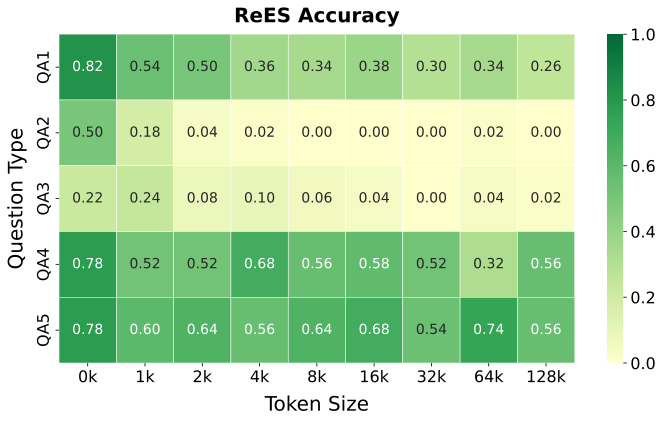

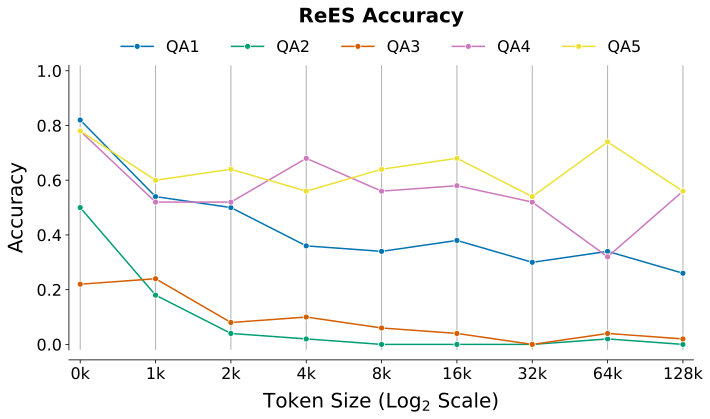

In [4]:
visualization.create_accuracy_figures(accuracy_df, "ReES Accuracy")

# Mean accuracy

In [6]:
accuracy_df['correct_guess'].mean()

np.float64(0.3595555555555556)